In [ ]:
import numpy as np
import pandas as pd 
from keras.utils import np_utils
np.random.seed(10)

from keras.datasets import mnist
(x_train_image, y_train_label),(x_test_image, y_test_label) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('train data=', len(x_train_image))
print('test data=', len(x_test_image))

print("x_train_image.shape:", x_train_image.shape)
print("x_test_image.shape:", x_test_image.shape)
print("y_train_label.shape:", y_train_label.shape)
print("y_test_label.shape:", y_test_label.shape)

train data= 60000
test data= 10000
x_train_image.shape: (60000, 28, 28)
x_test_image.shape: (10000, 28, 28)
y_train_label.shape: (60000,)
y_test_label.shape: (10000,)


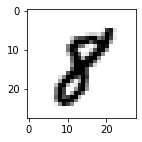

8


In [ ]:
import matplotlib.pyplot as plt

def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

#隨便抓一個畫出來看看
plot_image(x_train_image[17])
print(y_train_label[17])

訓練用的頭10張:


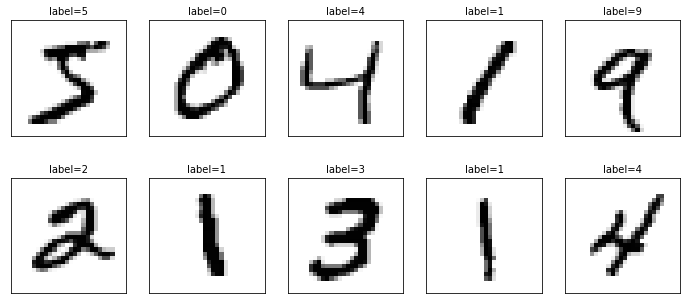


模擬考用的頭10張:


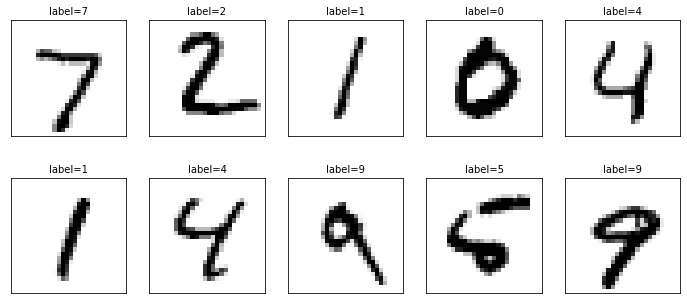

In [ ]:
def plot_images_labels(images, labels, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num): 
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()
print('訓練用的頭10張:')
plot_images_labels(x_train_image, y_train_label, idx=0) #畫訓練用的頭10張
print('\n模擬考用的頭10張:')
plot_images_labels(x_test_image, y_test_label, idx=0)   #畫模擬考用的頭10張

In [ ]:
x_Train = x_train_image.reshape(60000, 28*28).astype('float32') 
x_Test = x_test_image.reshape(10000, 28*28).astype('float32')

print('x_train:', x_Train.shape)
print('x_test:', x_Test.shape)

print(x_train_image[0])

x_Train_normalization = x_Train / 255
x_Test_normalization = x_Test / 255

print(x_Train_normalization[0])

print(y_train_label[:5])

y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

print(y_TrainOneHot[:5])

x_train: (60000, 784)
x_test: (10000, 784)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

x_train=x_train_image.reshape(60000,28,28,1).astype('float32')  
x_test=x_test_image.reshape(10000,28,28,1).astype('float32')
x_train_normalize=x_train/255
x_test_normalize=x_test/255
y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)

model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=36, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=36, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 36)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 36)          11700     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 36)        

In [ ]:
model.compile(loss='categorical_crossentropy',  
              optimizer='adam',metrics=['accuracy']) 

In [ ]:
train_history=model.fit(x=x_train_normalize, y=y_train_onehot,validation_split=0.2, epochs=10, batch_size=300,verbose=2)

Epoch 1/10
160/160 - 2s - loss: 0.9291 - accuracy: 0.6883 - val_loss: 0.1578 - val_accuracy: 0.9533 - 2s/epoch - 13ms/step
Epoch 2/10
160/160 - 1s - loss: 0.2598 - accuracy: 0.9240 - val_loss: 0.0995 - val_accuracy: 0.9692 - 1s/epoch - 9ms/step
Epoch 3/10
160/160 - 1s - loss: 0.1765 - accuracy: 0.9487 - val_loss: 0.0798 - val_accuracy: 0.9761 - 1s/epoch - 8ms/step
Epoch 4/10
160/160 - 1s - loss: 0.1385 - accuracy: 0.9604 - val_loss: 0.0662 - val_accuracy: 0.9812 - 1s/epoch - 8ms/step
Epoch 5/10
160/160 - 1s - loss: 0.1183 - accuracy: 0.9665 - val_loss: 0.0542 - val_accuracy: 0.9843 - 1s/epoch - 8ms/step
Epoch 6/10
160/160 - 1s - loss: 0.1032 - accuracy: 0.9709 - val_loss: 0.0607 - val_accuracy: 0.9821 - 1s/epoch - 8ms/step
Epoch 7/10
160/160 - 1s - loss: 0.0937 - accuracy: 0.9740 - val_loss: 0.0548 - val_accuracy: 0.9841 - 1s/epoch - 8ms/step
Epoch 8/10
160/160 - 1s - loss: 0.0792 - accuracy: 0.9774 - val_loss: 0.0454 - val_accuracy: 0.9873 - 1s/epoch - 8ms/step
Epoch 9/10
160/160 - 1s

In [ ]:
train_history.history["loss"]

[1.0260564088821411,
 0.27101248502731323,
 0.18302996456623077,
 0.15173105895519257,
 0.1287068873643875,
 0.11497718095779419,
 0.09950122982263565,
 0.09121246635913849,
 0.08115441352128983,
 0.07339734584093094]

In [ ]:
train_history.history['accuracy']

[0.6547499895095825,
 0.9194166660308838,
 0.9476249814033508,
 0.9570000171661377,
 0.964062511920929,
 0.9676041603088379,
 0.9716041684150696,
 0.9742083549499512,
 0.9774791598320007,
 0.979687511920929]

In [ ]:
train_history.history["val_loss"]

[0.1883297711610794,
 0.11743386089801788,
 0.10053311288356781,
 0.07264891266822815,
 0.06901054829359055,
 0.0684327706694603,
 0.06171085685491562,
 0.055205363780260086,
 0.053685251623392105,
 0.04914386570453644]

In [ ]:
train_history.history['val_accuracy']

[0.9437500238418579,
 0.9645000100135803,
 0.9695000052452087,
 0.9782500267028809,
 0.9806666374206543,
 0.9815000295639038,
 0.9835833311080933,
 0.984083354473114,
 0.9839166402816772,
 0.9860833287239075]

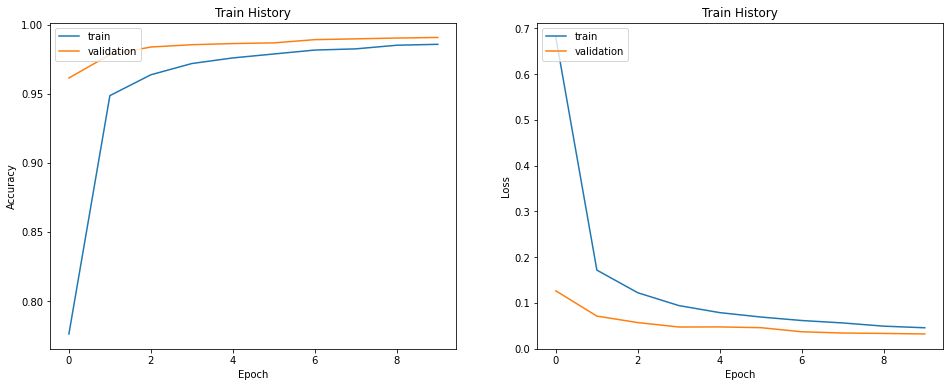

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history["val_accuracy"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

show_train_history(train_history)

In [ ]:
scores=model.evaluate(x_test_normalize, y_test_onehot)
print("Accuracy=", scores)
print("Accuracy=", scores[1])

model.save('./my_mnist.h5')

313/313 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9879
Accuracy= [0.038102518767118454, 0.9879000186920166]
Accuracy= 0.9879000186920166


In [ ]:
prediction=model.predict(x_test_normalize)
print(prediction)
class_prediction=np.argmax(prediction,axis=1)

[[4.88859397e-09 1.10851452e-07 7.75864635e-08 ... 9.99999046e-01
  1.01425524e-09 6.97391670e-07]
 [3.31976503e-06 3.01604609e-06 9.99990702e-01 ... 1.28566299e-07
  1.59214369e-06 7.54405566e-11]
 [6.17974194e-07 9.99975801e-01 1.19048605e-06 ... 5.05945673e-06
  1.07469839e-06 1.28764157e-07]
 ...
 [5.04637720e-10 1.57180526e-08 1.90252214e-09 ... 1.23868746e-08
  3.92307093e-08 1.48459394e-05]
 [5.72876218e-08 5.82222381e-10 3.17429905e-09 ... 1.88578553e-09
  1.06733005e-05 3.22218483e-07]
 [5.72503177e-06 3.06059320e-07 1.98677597e-07 ... 7.48941964e-10
  1.59347098e-06 6.08507333e-09]]


In [ ]:
#對前十題的答案
print(class_prediction[0])
print(class_prediction[1])
print(class_prediction[2])
print(class_prediction[3])
print(class_prediction[4])
print(class_prediction[5])
print(class_prediction[6])
print(class_prediction[7])
print(class_prediction[8])
print(class_prediction[9])

7
2
1
0
4
1
4
9
5
9
